In [1]:
!pip install kaggle
!kaggle datasets download nelgiriyewithana/apple-quality -p /home/ubuntu/machine-learning-zoomcamp/MyMachineLearningRepo/MyMidTermProject/data --unzip


Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality
License(s): other
  0%|                                                | 0.00/170k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 170k/170k [00:00<00:00, 16.9MB/s]


In [2]:

!python --version

Python 3.12.4


In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
df = pd.read_csv("../data/apple_quality.csv")
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [5]:
df .columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [6]:
# change all the strings to a uniform format
df .columns = df.columns.str.lower()

In [7]:
df.columns

Index(['a_id', 'size', 'weight', 'sweetness', 'crunchiness', 'juiciness',
       'ripeness', 'acidity', 'quality'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a_id         4000 non-null   float64
 1   size         4000 non-null   float64
 2   weight       4000 non-null   float64
 3   sweetness    4000 non-null   float64
 4   crunchiness  4000 non-null   float64
 5   juiciness    4000 non-null   float64
 6   ripeness     4000 non-null   float64
 7   acidity      4001 non-null   object 
 8   quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [9]:
df.describe()

,a_id,size,weight,sweetness,crunchiness,juiciness,ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [10]:
#check for null values in the dataframe
df.isnull().sum()

a_id           1
size           1
weight         1
sweetness      1
crunchiness    1
juiciness      1
ripeness       1
acidity        0
quality        1
dtype: int64

In [11]:
df.shape

(4001, 9)

In [12]:
#since there is only columnn across rows which has null value,drop those null values
df = df.dropna()

In [13]:
df.shape

(4000, 9)

In [14]:
df.isnull().sum()

a_id           0
size           0
weight         0
sweetness      0
crunchiness    0
juiciness      0
ripeness       0
acidity        0
quality        0
dtype: int64

In [15]:
# the column 'a_id' adds no value to this feature set, hence drop it
df.drop('a_id',axis=1,inplace=True)


In [16]:
#check the columns post the above processing
df.head()

,size,weight,sweetness,crunchiness,juiciness,ripeness,acidity,quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [17]:
df.dtypes

size           float64
weight         float64
sweetness      float64
crunchiness    float64
juiciness      float64
ripeness       float64
acidity         object
quality         object
dtype: object

In [18]:
#Change the acidity object type to float and map quality of good/bad to 1/0
df['acidity'] = df['acidity'].astype('float')
quality_mapping = {
    "good":1,
    "bad":0
}
df['quality'] = df['quality'].map(quality_mapping)

In [19]:
#Check the distribtion of the target variable 'quality' to ascertain if this a balanced or imbalanced dataset
df['quality'].value_counts()

quality
1    2004
0    1996
Name: count, dtype: int64

array([[<Axes: title={'center': 'size'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'sweetness'}>],
       [<Axes: title={'center': 'crunchiness'}>,
        <Axes: title={'center': 'juiciness'}>,
        <Axes: title={'center': 'ripeness'}>],
       [<Axes: title={'center': 'acidity'}>,
        <Axes: title={'center': 'quality'}>, <Axes: >]], dtype=object)

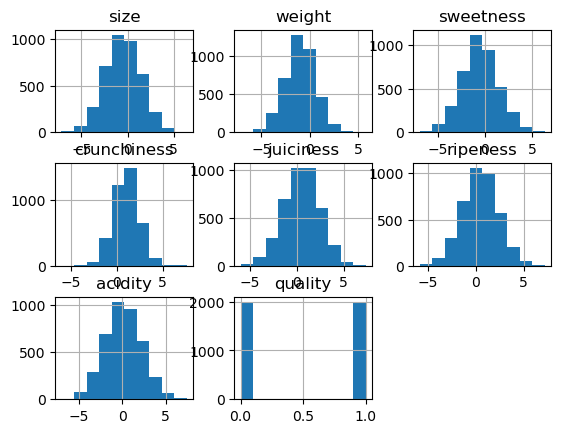

In [20]:
#visualize the distribution of the features in the dataframe
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df.hist()

In [21]:
#split the data into train/val/test with 60% and 40% distribution with random_state set to a value i.e 25 here
X = df.drop(columns=['quality'], axis=1)
y = df['quality']
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.6,random_state=25)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=25)

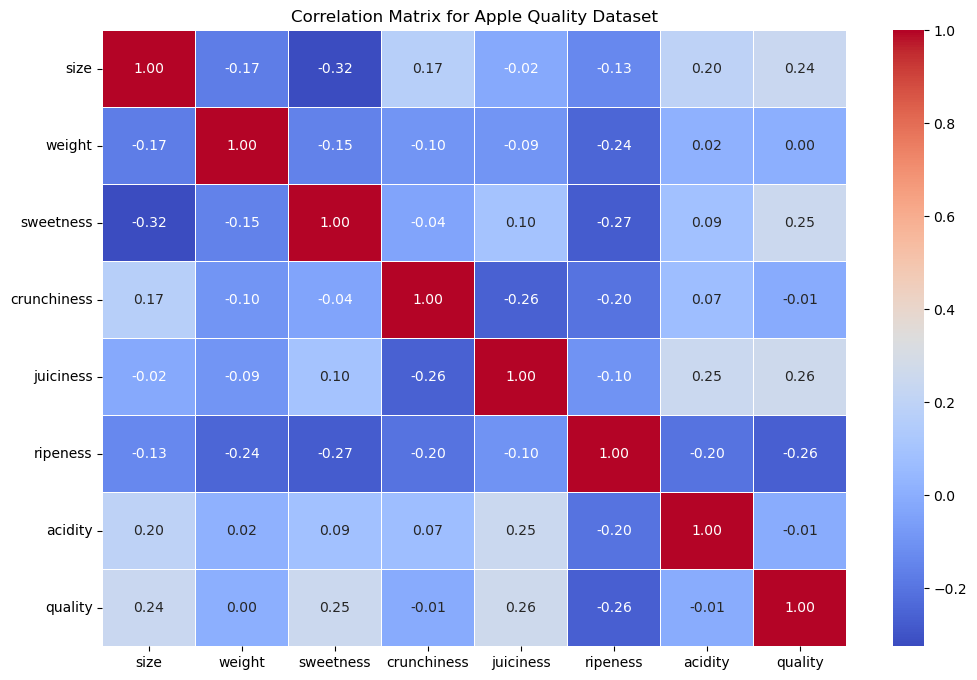

In [22]:
#plot the correlation matrix to visualize the correlation between the input features
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your cleaned DataFrame
# Calculate the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap with Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Display the plot
plt.title("Correlation Matrix for Apple Quality Dataset")
plt.show()

/tmp/ipykernel_16166/838878650.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True, bins=15)
/tmp/ipykernel_16166/838878650.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True, bins=15)
/tmp/ipykernel_16166/838878650.py:8: UserWarning: 

`distplot` is a 

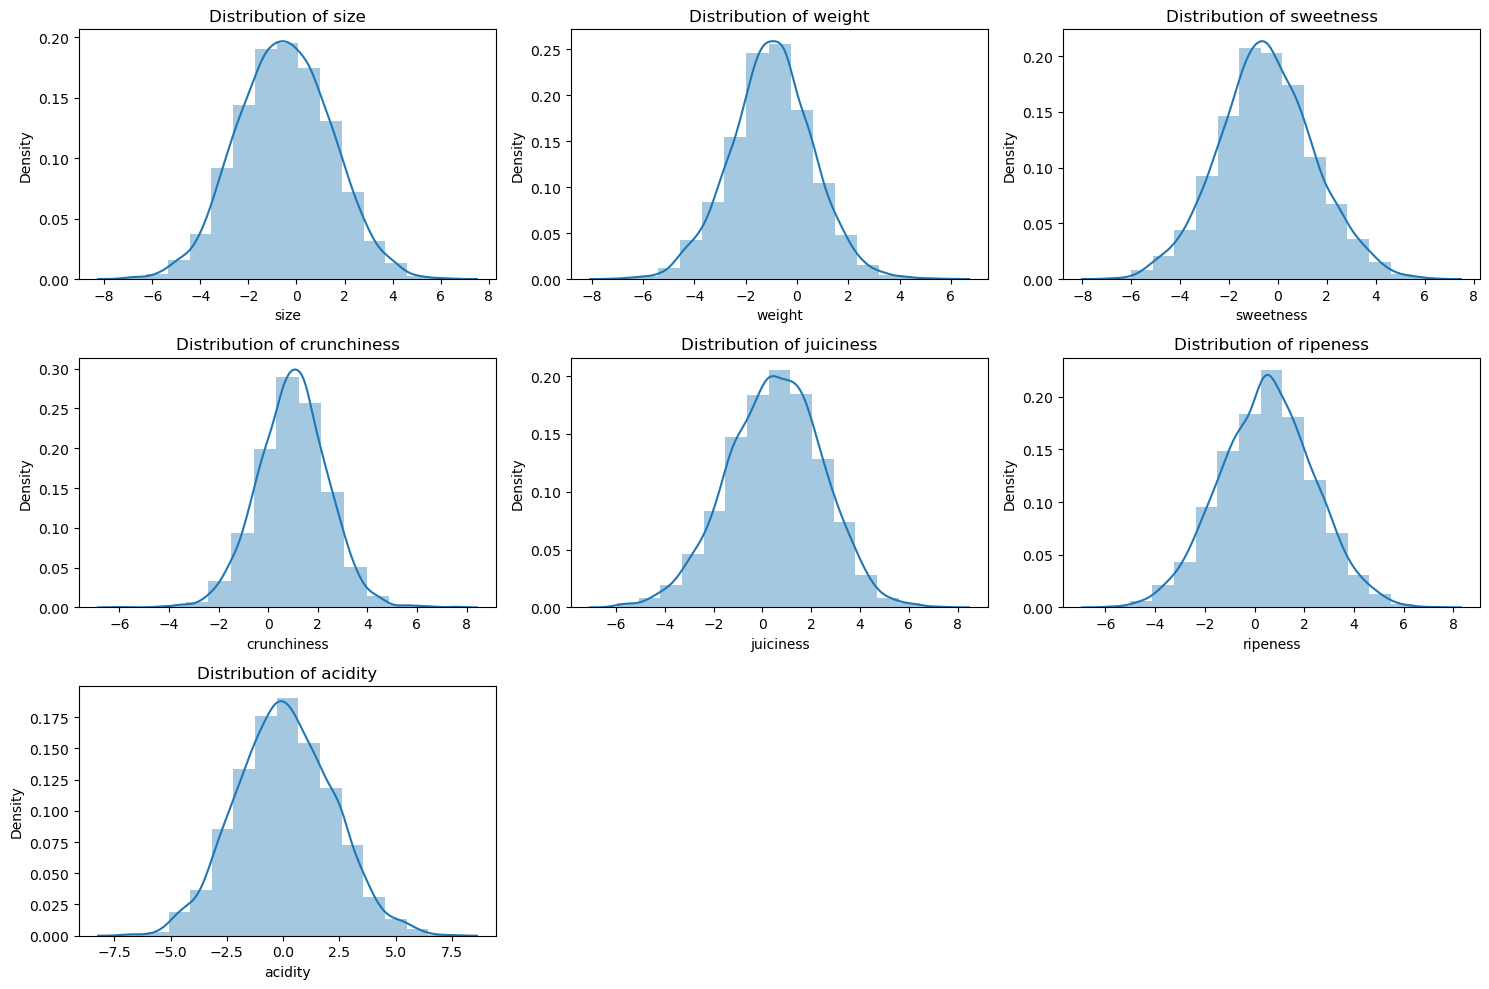

In [23]:
#visualize the parameters post scaling
import seaborn as sns
#column distribution
# Set up the plot grid
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):  # Exclude 'quality' for distribution
    plt.subplot(3, 3, i)  # Adjust grid based on the number of features
    sns.distplot(df[column], kde=True, bins=15)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()